In [1]:
import os
import zipfile
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import keras
import cv2
%matplotlib inline
#import K-Means
from sklearn.cluster import KMeans
# important metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
data = []
label = []
path = "./train/"
c = 0
d = 0
IMG_SIZE = 32
for file in os.listdir(path):
    img=cv2.imread(path+file)
    img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    img=img.astype('float32')
    if file[:3]=='cat':
        if c==500: continue
        c+=1
        label.append("cat")
    else:
        if d==500: continue
        d+=1
        label.append("dog")
    data.append(img)
data = np.array(data)

In [3]:
data


array([[[[ 93., 171., 210.],
         [103., 181., 224.],
         [114., 192., 235.],
         ...,
         [157., 227., 253.],
         [143., 218., 250.],
         [127., 208., 245.]],

        [[ 95., 168., 212.],
         [102., 177., 221.],
         [111., 186., 230.],
         ...,
         [162., 231., 250.],
         [143., 218., 250.],
         [137., 215., 244.]],

        [[ 95., 168., 212.],
         [101., 176., 220.],
         [103., 178., 222.],
         ...,
         [161., 230., 249.],
         [144., 219., 251.],
         [147., 219., 249.]],

        ...,

        [[ 65., 136., 173.],
         [ 68., 139., 176.],
         [ 65., 139., 173.],
         ...,
         [  2.,  10.,  10.],
         [  5.,  10.,  11.],
         [  3.,   8.,   9.]],

        [[ 61., 132., 166.],
         [ 65., 136., 173.],
         [ 68., 140., 174.],
         ...,
         [  1.,   6.,   5.],
         [  0.,   5.,   4.],
         [  0.,   5.,   4.]],

        [[ 57., 126., 158.],
       

In [4]:
label

['cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',


In [5]:
data_label=[]
for i in label:
    if i=='cat': data_label.append(0)
    else : data_label.append(1)
data_label=np.array(data_label)

In [6]:
print("total :",len(data_label))

total : 1000


In [7]:
data=data/255.0
reshaped_data=data.reshape(len(data),-1)

In [8]:
len(reshaped_data)

1000

In [14]:
kmeans=KMeans(n_clusters=2,random_state=0)
clusters=kmeans.fit_predict(reshaped_data)
kmeans.cluster_centers_.shape

(2, 3072)

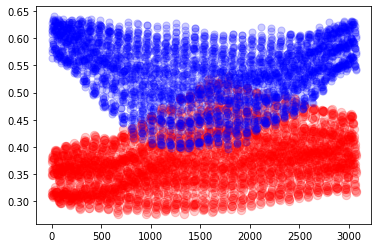

In [15]:
x_data=[i for i in range(3072)]
plt.scatter(x_data,kmeans.cluster_centers_[0],color='red',alpha=0.2,s=70)
plt.scatter(x_data,kmeans.cluster_centers_[1],color='blue',alpha=0.2,s=50)

In [16]:
def get_reference_dict(clusters,data_label):
    reference_label={}
    for i in range(len(np.unique(clusters))):
        index=np.where(clusters==i,1,0)
        num=np.bincount(data_label[index==1]).argmax()
        reference_label[i]=num
    return reference_label
def get_labels(clusters,reference_labels):
    temp_labels=np.random.rand(len(clusters))
    for i in range(len(clusters)):
        temp_labels[i]=reference_labels[clusters[i]]
    return temp_labels

In [17]:
reference_labels=get_reference_dict(clusters,data_label)
predicted_labels=get_labels(clusters,reference_labels)
print(accuracy_score(predicted_labels,data_label))

0.512
